# Random Walks en Alianzas de Aerolíneas

In [19]:
using StatsBase

In [21]:
using DelimitedFiles

In [43]:
using Plots

In [23]:
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

In [1]:
"""
n_in_degree(M, n)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree (generic function with 1 method)

In [2]:
"""
in_degree(M)

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function in_degree(M::Array)
    grados_entrada = sum(M, dims = 2)
end

in_degree (generic function with 1 method)

In [3]:
"""
n_out_degree(M, n)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree (generic function with 1 method)

In [4]:
"""
out_degree(M)

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function out_degree(M::Array)
    grados_salida = sum(M, dims = 1)
end

out_degree (generic function with 1 method)

In [5]:
"""
La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar 
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""

function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    nodos = size(M, 1) #aeropuertos  
    paths = zeros(Int64, (iter, steps + 1))
    s = f

    for i in 1:iter
        paths[i, 1] = f
        for p in 1:steps 
            row = M[s, :] #Renglón correspondiente al nodo s
            vecinos = findall(x -> x != 0, row)
            if vecinos == []
                break
            else
                a = sample(vecinos)
                paths[i, p + 1] = a
            s = a
            end
        end
        s = f
    end
    return paths 
end

r_walks (generic function with 1 method)

In [6]:
"""
La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar 
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) #Debo agregarle el nodo inicial al inicio del path
    random_walks = []
    nodos = size(M, 1)
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    random_walks
end

random_walk (generic function with 1 method)

In [7]:
function walk_length(W)
    
    longitudes = Array[]
    c = 0
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v
        #@show i
        for j in 1:s
            #@show j
            for k in 1:t
                #@show k
                
                if W[i][j, :][k] != 0 #W[i][j, :] #renglón a analizar
                    c += 1 
                else
                    break
                    
                    #@show c
                    
                    #@show long #ant[i][j] = W[i][j, :][k - 1]
                    
                end
                
            end
            longz[j] = c - 1
            #@show longz[j]
            c = 0
            
        end
        push!(longitudes, longz)
        #@show longitudes
        longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    end
    return longitudes
end

walk_length (generic function with 1 method)

In [8]:
"""
La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la 
función walk_length). 
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de 
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""

function walk_av_length(W) #Llamar a función
    
    proms = []
    wlength = walk_length(W)
    
    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    proms
end

walk_av_length (generic function with 1 method)

In [9]:
"""
La función n_cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""

function n_cobertura(W)
    
    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end
        push!(cobert, visit)
        visit = []
    end
    return cobert
end

n_cobertura (generic function with 1 method)

In [10]:
"""
La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""

#Tal vez falta llamar dentro de la función a la función n_cobertura

function cobertura(W) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = n_cobertura(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    return cobert
end

cobertura (generic function with 1 method)

In [11]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura

function n_length_av(W) #Esta es la importante
    
    longitud = []
    x = cobertura(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    longitud
end

n_length_av (generic function with 1 method)

In [12]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura y n_length_av

function length_av(W)
    x = n_length_av(W)
    promedio = mean(x)
    return promedio

end

length_av (generic function with 1 method)

In [13]:
"""

"""


function max_length(W)
    max = []
    x = cobertura(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end

max_length (generic function with 1 method)

In [14]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura

function Max_length(W)
    x = max_length(W)
    m = maximum(x)
    return m
end

Max_length (generic function with 1 method)

In [15]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura

function av_max_length(W)
    x = max_length(W)
    prom = mean(x)
    return prom
end

av_max_length (generic function with 1 method)

In [16]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura

function min_length(W)
    min = []
    x = cobertura(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end

min_length (generic function with 1 method)

In [17]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura

function Min_length(W)
    x = min_length(W)
    m = minimum(x)
    return m
end

Min_length (generic function with 1 method)

In [18]:
"""

"""

#Tal vez falta llamar dentro de la función a la función n_cobertura y cobertura

function av_min_length(W)
    x = min_length(W)
    prom = mean(x)
    return prom
end

av_min_length (generic function with 1 method)

In [ ]:
function atractor(W) #Debo llamar a walks
   atractores = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            if 
            a = W[i][j, :])
            push!(visit, u)
        end
        push!(cobert, visit)
        visit = []
    end
    return cobert
end

## Datos

In [24]:
mSA = readdlm("data/multi_SA_du.csv", ',');

In [25]:
multiSA = mSA[2:end, :];
multiSA = multiSA[:, 2:end];

In [26]:
multiplexSA = convert(Array{Int64,2}, multiSA)

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [27]:
mOW = readdlm("data/multi_OW_du.csv", ',');

In [28]:
multiOW = mOW[2:end, :];
multiOW = multiOW[:, 2:end];

In [29]:
multiplexOW = convert(Array{Int64,2}, multiOW)

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [30]:
mST = readdlm("data/multi_ST_du.csv", ',');

In [31]:
multiST = mST[2:end, :];
multiST = multiST[:, 2:end];

In [32]:
multiplexST = convert(Array{Int64,2}, multiST)

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

## Caminatas aleatorias

### Star Alliance

In [33]:
caminata_SA = @time random_walk(multiplexSA, 100, 5)

  5.748412 seconds (5.32 M allocations: 3.812 GiB, 8.04% gc time)


934-element Array{Any,1}:
 [1 40 … 152 106; 1 40 … 108 245; … ; 1 40 … 298 235; 1 3 … 233 194]           
 [2 348 … 365 26; 2 83 … 19 541; … ; 2 20 … 175 191; 2 62 … 83 735]            
 [3 43 … 162 130; 3 64 … 298 215; … ; 3 71 … 101 162; 3 5 … 279 89]            
 [4 19 … 0 0; 4 223 … 347 320; … ; 4 223 … 45 553; 4 290 … 656 136]            
 [5 3 … 199 237; 5 3 … 119 263; … ; 5 3 … 73 176; 5 3 … 126 215]               
 [6 235 … 418 119; 6 54 … 136 457; … ; 6 83 … 542 26; 6 80 … 125 262]          
 [7 72 … 11 15; 7 3 … 117 920; … ; 7 26 … 16 71; 7 54 … 153 115]               
 [8 23 … 562 83; 8 23 … 87 880; … ; 8 23 … 108 250; 8 23 … 95 162]             
 [9 45 … 318 392; 9 117 … 365 223; … ; 9 2 … 174 351; 9 760 … 136 132]         
 [10 11 … 908 263; 10 16 … 483 443; … ; 10 553 … 247 251; 10 54 … 235 298]     
 [11 451 … 179 177; 11 20 … 72 65; … ; 11 572 … 276 259; 11 6 … 88 263]        
 [12 578 … 211 19; 12 600 … 117 893; … ; 12 62 … 322 482; 12 54 … 89 870]      
 [13 15 … 113 

### OneWorld

In [35]:
caminata_OW = @time random_walk(multiplexOW, 100, 5)

  2.528318 seconds (3.03 M allocations: 1.876 GiB, 9.29% gc time)


698-element Array{Any,1}:
 [1 3 … 0 0; 1 2 … 178 47; … ; 1 135 … 0 0; 1 129 … 178 84]            
 [2 117 … 180 159; 2 231 … 178 145; … ; 2 225 … 261 62; 2 14 … 554 373]
 [3 207 … 217 46; 3 46 … 0 0; … ; 3 46 … 0 0; 3 1 … 437 438]           
 [4 177 … 96 380; 4 177 … 51 118; … ; 4 177 … 625 653; 4 177 … 139 46] 
 [5 61 … 72 46; 5 61 … 120 540; … ; 5 61 … 62 177; 5 61 … 188 161]     
 [6 46 … 224 178; 6 46 … 173 393; … ; 6 46 … 30 127; 6 46 … 0 0]       
 [7 46 … 0 0; 7 46 … 531 305; … ; 7 177 … 0 0; 7 177 … 120 388]        
 [8 177 … 251 115; 8 177 … 0 0; … ; 8 265 … 567 273; 8 120 … 178 247]  
 [9 178 … 75 46; 9 178 … 590 292; … ; 9 178 … 2 187; 9 178 … 451 89]   
 [10 3 … 247 61; 10 46 … 120 323; … ; 10 46 … 127 301; 10 3 … 177 65]  
 [11 1 … 122 255; 11 2 … 61 152; … ; 11 1 … 0 0; 11 1 … 347 62]        
 [12 292 … 0 0; 12 127 … 301 305; … ; 12 292 … 0 0; 12 261 … 271 240]  
 [13 61 … 0 0; 13 61 … 89 434; … ; 13 61 … 229 564; 13 127 … 61 181]   
 ⋮                                    

### Sky Team

In [36]:
caminata_ST = @time random_walk(multiplexST, 100, 5)

  4.863587 seconds (4.54 M allocations: 3.404 GiB, 9.52% gc time)


900-element Array{Any,1}:
 [1 15 … 61 60; 1 15 … 176 835; … ; 1 15 … 171 287; 1 15 … 682 201]             
 [2 35 … 115 249; 2 31 … 18 194; … ; 2 37 … 33 13; 2 37 … 188 608]              
 [3 277 … 123 238; 3 297 … 139 35; … ; 3 614 … 703 92; 3 117 … 492 49]          
 [4 35 … 658 164; 4 35 … 104 161; … ; 4 35 … 197 95; 4 35 … 113 3]              
 [5 31 … 522 497; 5 95 … 201 659; … ; 5 31 … 184 95; 5 133 … 794 188]           
 [6 25 … 61 883; 6 136 … 156 3; … ; 6 35 … 95 79; 6 136 … 512 605]              
 [7 33 … 385 73; 7 22 … 554 337; … ; 7 25 … 195 31; 7 31 … 380 407]             
 [8 286 … 0 0; 8 95 … 249 271; … ; 8 95 … 276 139; 8 289 … 171 65]              
 [9 18 … 611 3; 9 3 … 380 95; … ; 9 42 … 62 55; 9 18 … 0 0]                     
 [10 143 … 627 842; 10 123 … 437 454; … ; 10 161 … 65 164; 10 34 … 412 73]      
 [11 2 … 92 95; 11 2 … 526 65; … ; 11 133 … 316 877; 11 35 … 48 519]            
 [12 33 … 143 197; 12 3 … 522 730; … ; 12 33 … 0 0; 12 3 … 133 18]              
 [

## Longitud de las caminatas 

In [92]:
@time walk_length(caminata_SA)

  0.583873 seconds (1.49 M allocations: 415.414 MiB, 9.11% gc time)


934-element Array{Array,1}:
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [58, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 33, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 ⋮                        
 [100, 100, 100, 100, 14] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

In [93]:
@time walk_length(caminata_OW)

  0.345002 seconds (914.13 k allocations: 264.501 MiB, 10.28% gc time)


698-element Array{Array,1}:
 [64, 100, 20, 29, 100]   
 [100, 100, 29, 100, 100] 
 [100, 2, 100, 12, 100]   
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 29] 
 [6, 100, 100, 5, 100]    
 [100, 27, 100, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 95, 100] 
 [31, 100, 100, 23, 100]  
 [11, 100, 100, 100, 100] 
 ⋮                        
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

In [94]:
@time walk_length(caminata_ST)

  0.485053 seconds (1.39 M allocations: 387.701 MiB, 8.87% gc time)


900-element Array{Array,1}:
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [72, 100, 100, 100, 100] 
 [100, 100, 100, 100, 70] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 91, 100] 
 [100, 100, 100, 100, 100]
 ⋮                        
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

## Longitud promedio de las caminatas

In [95]:
@time walk_av_length(caminata_SA)

  0.631237 seconds (1.66 M allocations: 424.480 MiB, 8.31% gc time)


934-element Array{Any,1}:
 100.0
 100.0
 100.0
  91.6
 100.0
 100.0
  86.6
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
   ⋮  
  82.8
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
   0.0
   0.0
   0.0
   0.0

In [96]:
@time walk_av_length(caminata_OW)

  0.326123 seconds (914.84 k allocations: 264.528 MiB, 9.00% gc time)


698-element Array{Any,1}:
  62.6
  85.8
  62.8
 100.0
 100.0
  85.8
  62.2
  85.4
 100.0
 100.0
  99.0
  70.8
  82.2
   ⋮  
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [97]:
@time walk_av_length(caminata_ST)

  0.479293 seconds (1.39 M allocations: 387.731 MiB, 9.09% gc time)


900-element Array{Any,1}:
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
  94.4
  94.0
 100.0
 100.0
  98.2
 100.0
   ⋮  
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
   0.0
   0.0
   0.0
   0.0

## Cobertura

In [99]:
cobs_SA = @time cobertura(caminata_SA)

  0.065137 seconds (102.01 k allocations: 31.075 MiB, 16.77% gc time)


934-element Array{Any,1}:
 [70, 62, 71, 73, 74]
 [62, 67, 68, 71, 62]
 [63, 73, 69, 73, 58]
 [46, 66, 69, 69, 71]
 [67, 67, 64, 65, 76]
 [63, 61, 70, 61, 71]
 [69, 71, 30, 74, 70]
 [69, 67, 70, 70, 69]
 [71, 66, 71, 69, 67]
 [68, 64, 70, 71, 70]
 [76, 66, 71, 66, 72]
 [65, 72, 68, 73, 72]
 [70, 70, 62, 65, 74]
 ⋮                   
 [72, 69, 71, 76, 16]
 [72, 64, 75, 71, 63]
 [77, 63, 71, 62, 69]
 [66, 71, 74, 72, 68]
 [70, 68, 64, 66, 68]
 [77, 65, 63, 77, 74]
 [70, 66, 75, 67, 65]
 [69, 63, 62, 68, 68]
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     

In [111]:
cobs_OW = @time cobertura(caminata_OW)

  0.022477 seconds (70.70 k allocations: 18.894 MiB)


698-element Array{Any,1}:
 [46, 64, 17, 23, 66]
 [60, 54, 21, 54, 61]
 [61, 4, 66, 9, 63]  
 [61, 67, 61, 56, 60]
 [59, 54, 57, 57, 64]
 [56, 61, 64, 55, 22]
 [7, 58, 62, 7, 59]  
 [62, 22, 72, 63, 60]
 [61, 60, 58, 61, 69]
 [60, 61, 61, 60, 63]
 [66, 57, 57, 61, 65]
 [25, 63, 64, 20, 65]
 [11, 64, 62, 60, 55]
 ⋮                   
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     

In [112]:
cobs_ST = @time cobertura(caminata_ST)

  0.045501 seconds (96.99 k allocations: 28.836 MiB, 24.08% gc time)


900-element Array{Any,1}:
 [67, 71, 57, 71, 64]
 [65, 70, 64, 70, 70]
 [64, 62, 68, 71, 67]
 [72, 63, 73, 69, 73]
 [78, 70, 68, 67, 67]
 [70, 72, 70, 68, 66]
 [63, 65, 66, 65, 68]
 [53, 61, 65, 72, 71]
 [64, 68, 74, 68, 44]
 [62, 65, 64, 64, 73]
 [63, 67, 68, 66, 66]
 [65, 68, 65, 63, 76]
 [73, 70, 69, 65, 66]
 ⋮                   
 [59, 65, 66, 68, 66]
 [70, 74, 67, 68, 68]
 [65, 66, 69, 68, 69]
 [67, 62, 64, 69, 64]
 [65, 69, 63, 67, 69]
 [65, 64, 68, 70, 56]
 [68, 62, 58, 65, 69]
 [66, 71, 68, 58, 66]
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     

## Cobertura promedio de las caminatas de cada aeropuerto inicial

In [100]:
dif_SA = @time n_length_av(caminata_SA)

  0.046416 seconds (102.95 k allocations: 31.105 MiB, 9.83% gc time)


934-element Array{Any,1}:
 70.0
 66.0
 67.2
 64.2
 67.8
 65.2
 62.8
 69.0
 68.8
 68.6
 70.2
 70.0
 68.2
  ⋮  
 60.8
 69.0
 68.4
 70.2
 67.2
 71.2
 68.6
 66.0
  2.0
  2.0
  2.0
  2.0

In [101]:
dif_OW = @time n_length_av(caminata_OW)

  0.026089 seconds (71.41 k allocations: 18.921 MiB, 16.53% gc time)


698-element Array{Any,1}:
 43.2
 50.0
 40.6
 61.0
 58.2
 51.6
 38.6
 55.8
 61.8
 61.0
 61.2
 47.4
 50.4
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

In [102]:
dif_ST = @time n_length_av(caminata_ST)

  0.039414 seconds (97.89 k allocations: 28.866 MiB, 10.82% gc time)


900-element Array{Any,1}:
 66.0
 67.8
 66.4
 70.0
 70.0
 69.2
 65.4
 64.4
 63.6
 65.6
 66.0
 67.4
 68.6
  ⋮  
 64.8
 69.4
 67.4
 65.2
 66.6
 64.6
 64.4
 65.8
  2.0
  2.0
  2.0
  2.0

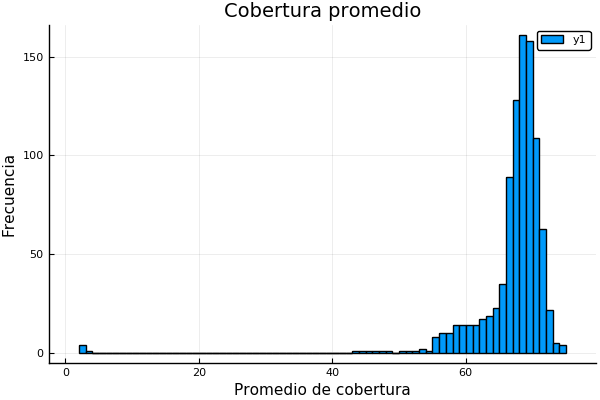

In [108]:
difSA = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

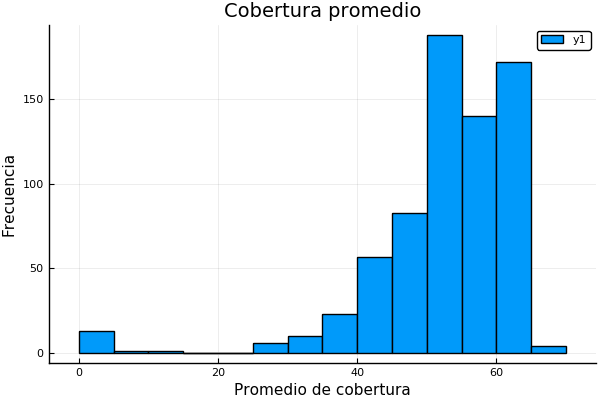

In [107]:
difOW = histogram(dif_OW, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

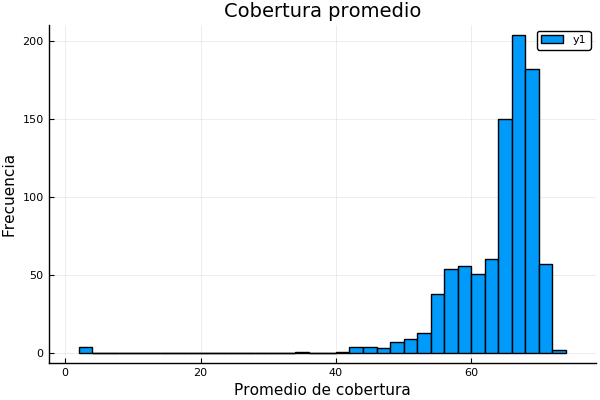

In [106]:
difST = histogram(dif_ST, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

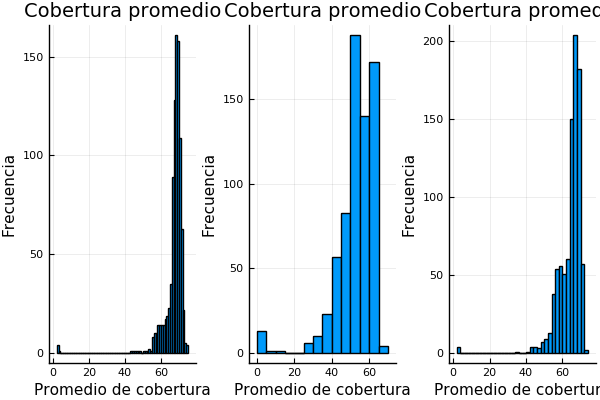

In [109]:
plot(difSA, difOW, difST, layout=(1,3),legend=false)

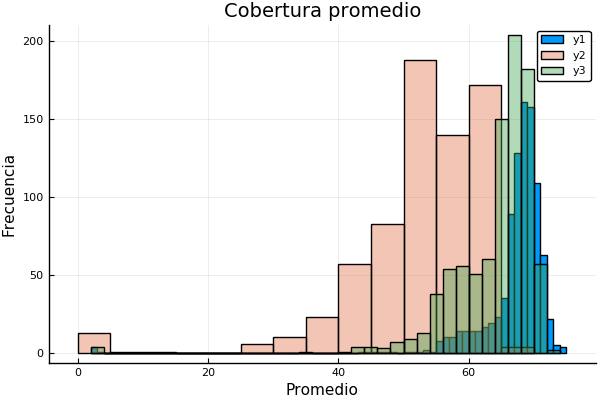

In [110]:
difs = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
histogram!(dif_OW, falpha=0.4)
histogram!(dif_ST, falpha=0.4)

In [ ]:
#Plot que en el eje x tenga cada nodo inicial (aeropuerto) y en el eje y el promedio

In [ ]:
h = bar(1:80, frqs, color="#0f87bf",align="center",alpha=0.4)

## Cobertura promedio por alianza

In [40]:
cobp_SA = @time length_av(caminata_SA)

  0.095833 seconds (188.76 k allocations: 35.617 MiB, 4.43% gc time)


66.93725910064244

In [41]:
cobp_OW = @time length_av(caminata_OW)

  0.028621 seconds (72.81 k allocations: 18.942 MiB, 20.29% gc time)


52.30888252148997

In [42]:
cobp_ST = @time length_av(caminata_ST)

  0.041603 seconds (99.69 k allocations: 28.893 MiB, 18.67% gc time)


63.88933333333333

In [77]:
cobs_prom = plot(cobp_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
plot!(cobp_OW, falpha=0.5)
plot!(cobp_ST, falpha=0.3)

ErrorException: No user recipe defined for Float64

## 